In [6]:
from pathlib import Path
import json

annotations = []
for p in Path("data").glob("*.json"):
    with open(p, encoding="utf-8") as f:
        print(p)
        annotations.append(json.load(f))

evaluations = {
    sentence: [
        annotation[sentence] for annotation in annotations if sentence in annotation
    ]
    for sentence in {
        sentence for annotation in annotations for sentence in annotation.keys()
    }
}

X = [s for s in evaluations.keys()]
y = [int(sum(e) > 0) for e in evaluations.values()]

data/evaluation-experiment-2-stage #1-sa6a0y.json
data/evaluation-experiment-2-stage #1-2m6dmb.json


In [7]:
y1 = [e[0] for e in evaluations.values() if len(e) == 2]
y2 = [e[1] for e in evaluations.values() if len(e) == 2]

In [8]:
import sklearn.metrics

sklearn.metrics.cohen_kappa_score(y1, y2)

0.3546448712421808

In [9]:
X = [s for s in evaluations.keys()]
y = [int(sum(e) > 0) for e in evaluations.values()]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Pipeline(
    steps=[
        ("vectorizer", TfidfVectorizer(sublinear_tf=True, min_df=3, max_df=0.3)),
        ("classifier", LinearSVC()),
    ]
)  # baseline model

model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.3, min_df=3, sublinear_tf=True)),
                ('classifier', LinearSVC())])

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv=5)

array([0.81, 0.68, 0.73, 0.75, 0.81])

              precision    recall  f1-score   support

       False       0.73      0.96      0.83        45
        True       0.95      0.71      0.81        55

    accuracy                           0.82       100
   macro avg       0.84      0.83      0.82       100
weighted avg       0.85      0.82      0.82       100



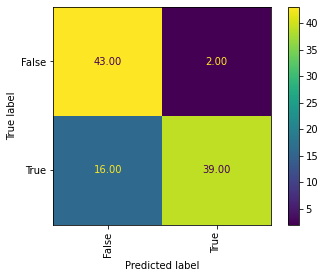

In [12]:
y_predicted = model.predict(X_test)
print(
    sklearn.metrics.classification_report(
        [y > 0 for y in y_test], [y > 0 for y in y_predicted]
    )
)
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(
    [y > 0 for y in y_test],
    [y > 0 for y in y_predicted],
    xticks_rotation="vertical",
    values_format=".2f",
)
None